In [1]:
import pandas as pd
import math
import re
pd.options.display.max_rows = 150

In [2]:
airline_data = pd.read_csv("skytrax.csv")

In [3]:
data = [airline_data]
names = ["Airline"]
for i in range(0,len(data)):
    print ("Dataset: %s\nNum. Samples: %d\n\nNum. Values per Column" % (names[i], len(data[i])))
    for c in data[i].columns:
        print ("(%s) %s: %d" % (data[i][c].dtype, c, data[i][c].count()))
    print ("\n\n")

Dataset: Airline
Num. Samples: 41396

Num. Values per Column
(object) airline_name: 41396
(object) link: 41396
(object) title: 41396
(object) author: 41396
(object) author_country: 39805
(object) date: 41396
(object) content: 41396
(object) aircraft: 1278
(object) type_traveller: 2378
(object) cabin_flown: 38520
(object) route: 2341
(float64) overall_rating: 36861
(float64) seat_comfort_rating: 33706
(float64) cabin_staff_rating: 33708
(float64) food_beverages_rating: 33264
(float64) inflight_entertainment_rating: 31114
(float64) ground_service_rating: 2203
(float64) wifi_connectivity_rating: 565
(float64) value_money_rating: 39723
(int64) recommended: 41396





In [4]:
def getCity(route, needOrigin):
    if pd.isna(route):
        return "NaN"
    try:
        if needOrigin:
            return route.split(" to ")[0]
        else:
            return route.split(" to ")[1]
    except:
        print (route)

In [5]:
easyjet = airline_data.loc[airline_data['airline_name'] == "easyjet"]
easyjet = easyjet[["date", "author_country", "content", "cabin_flown", "route", "overall_rating", "recommended" ]]

easyjet.rename(columns={'author_country':'Country','content':'text','cabin_flown':'cabin', 'overall_rating':'score','recommended':'Recommended'},inplace=True)

easyjet['origin']=list(map(lambda x:getCity(x, True),easyjet.route))
easyjet['destin']=list(map(lambda x:getCity(x, False),easyjet.route))
easyjet = easyjet.drop(columns="route")
easyjet.head()

,date,Country,text,cabin,score,Recommended,origin,destin
13834,2015-07-31,Italy,"The flight was nice and comfortable, as always...",Economy,9.0,1,Milan Malpensa,Brussels National
13839,2015-07-30,Portugal,"2 trips within 3 days, FNC-BRS-FNC. 1st flight...",First Class,3.0,0,Bristol,Funchal
13840,2015-07-28,United Kingdom,Overall a good value for money experience with...,Economy,7.0,1,London Luton,Nice
13844,2015-07-27,United Kingdom,I haven't flown with this airline for 8 years....,Economy,4.0,0,Bristol,Corfu
13848,2015-07-26,United Kingdom,"Good flight both ways, checked in online using...",Economy,9.0,1,Liverpool,Faro


In [6]:
def getCities(text, needOrigin, current):
    if not current == "NaN":
        return current
    try:
        temp = re.findall('[A-Z][A-Z][A-Z]-[A-Z][A-Z][A-Z]',text)[0].split('-')
    except IndexError:
        try:
            temp = re.findall('[A-Z][A-Z][A-Z] to [A-Z][A-Z][A-Z]',text)[0].split('to')
        except IndexError:
            try:
                extract = re.findall("to [\w ]+ from [\w]+", text)[0].split(" ")
                temp = (extract[1], extract[-1])
            except IndexError:
                try:
                    if text.split(" ")[1] == "to":
                        extract = re.findall("[\w ]+ to [\w]+", text)[0].split(" ")
                        temp = (extract[0], extract[-1])
                    else:
                        extract = re.findall("from [\w ]+ to [\w]+", text)[0].split(" ")
                        temp = (extract[1], extract[-1])
                except IndexError:
                    try:
                        extract = re.findall("fl[oe]wn? [\w ]+ to [\w]+", text.lower())[0].split(" ")
                        temp = (extract[1], extract[-1])
                    except IndexError:
                        try:
                            temp = re.findall('[\w]+-[\w]+',text.split(".")[0])[0].split('-')
                        except:
                            try:
                                temp = re.findall('[\w]+ - [\w]+',text.split(".")[0])[0].split('-')
                            except:
                                temp = ("NaN","NaN")
    
    if needOrigin:
        return temp[0].strip()
    else:
        return temp[1].strip()

easyjet['origin']=list(map(lambda x,y:getCities(x, True, y),easyjet.text, easyjet.origin))
easyjet['destin']=list(map(lambda x,y:getCities(x, False, y),easyjet.text, easyjet.destin))

import requests

def code2city(code):
    if len(code) == 3 and code.lower()!= "nan":
        try:
            url = "http://iatacodes.org/api/v6/cities?api_key=0351c585-8eab-4147-8895-db6626300654&code="
            r = requests.get(url+code)
            return r.json()["response"][0]["name"]
        except:
            if code == "LHR" or code =="LGW":
                return "London"
            elif code == "STN":
                return "Stansted"
            elif code == "TXL" or code == "SXF":
                return "Berlin"
            elif code == "FCO":
                return "Rome"
            else:
                print (code)
            return code
    else:
        return code

easyjet['origin']=list(map(lambda x:code2city(x),easyjet.origin))
easyjet['destin']=list(map(lambda x:code2city(x),easyjet.destin))


CDG
LTN
SEN
lgw
MXP
use
CDG
LTN
KEF
SEN
SEN
LTN
LTN
SEN
CDG
LTN
CDG
BSL
BSL
CIA
CDG
MXP
lgw
DME
CDG
VEN
LTN
DME
DME
3rd
KEF
DME
DME
MXP
MXP
CDG
TFS


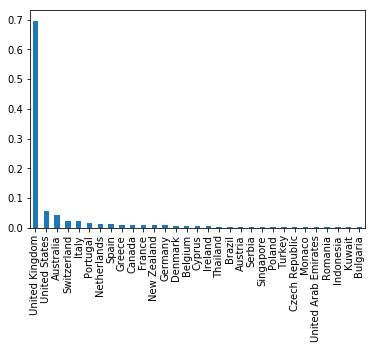

In [10]:
pd.value_counts(easyjet['Country'], sort=True, normalize=True).plot.bar()

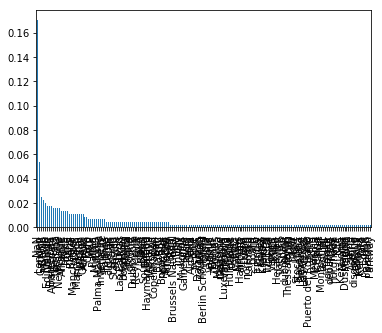

In [8]:
pd.value_counts(easyjet['destin'], dropna=False, normalize=True).plot.bar()

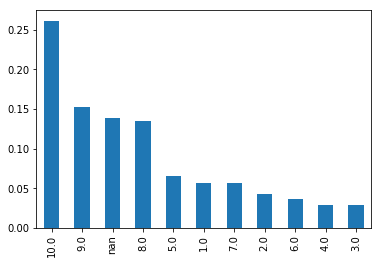

In [12]:
pd.value_counts(easyjet['score'], dropna=False, normalize=True).plot.bar()

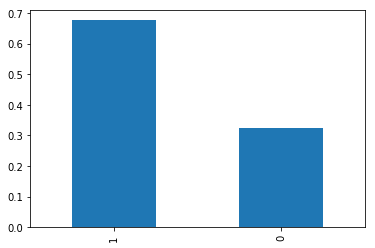

In [14]:
pd.value_counts(easyjet['Recommended'], dropna=False, normalize=True).plot.bar()

In [16]:
easyjet.to_pickle('easyjet.pkl')

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
data = pd.read_pickle('easyjet.pkl')

In [20]:
sentimentAnalyzer = SentimentIntensityAnalyzer()
data['senti']=list(map(lambda x:sentimentAnalyzer.polarity_scores(x),data.text))
data['sentiment_com']= list(map(lambda x:x['compound'],data.senti))
data['sentiment_pos'] = list(map(lambda x:x['pos'],data.senti))
data['sentiment_neg']= list(map(lambda x:x['neg'],data.senti))
data['sentiment_neu']= list(map(lambda x:x['neu'],data.senti))
data = data.drop(columns="senti")

In [21]:

data

,date,Country,text,cabin,score,Recommended,origin,destin,sentiment_com,sentiment_pos,sentiment_neg,sentiment_neu
13834,2015-07-31,Italy,"The flight was nice and comfortable, as always...",Economy,9.0,1,Milan Malpensa,Brussels National,0.7938,0.196,0.070,0.735
13839,2015-07-30,Portugal,"2 trips within 3 days, FNC-BRS-FNC. 1st flight...",First Class,3.0,0,Bristol,Funchal,0.0043,0.105,0.090,0.805
13840,2015-07-28,United Kingdom,Overall a good value for money experience with...,Economy,7.0,1,London Luton,Nice,0.9579,0.114,0.053,0.833
13844,2015-07-27,United Kingdom,I haven't flown with this airline for 8 years....,Economy,4.0,0,Bristol,Corfu,0.9087,0.234,0.108,0.659
13848,2015-07-26,United Kingdom,"Good flight both ways, checked in online using...",Economy,9.0,1,Liverpool,Faro,0.9661,0.283,0.017,0.700
13849,2015-07-26,Denmark,"CPH-BRS. Bag drop at Copenhagen T2 was fast, a...",Economy,9.0,1,Copenhagen,Bristol,0.9791,0.159,0.071,0.770
13854,2015-07-26,United Kingdom,They had the new thinner seats on this flight ...,Economy,8.0,1,Krakow,Edinburgh,0.8591,0.174,0.000,0.826
13855,2015-07-23,United Kingdom,"Usual easyJet flight - on time, reasonable ref...",Economy,8.0,1,Liverpool,Menorca,0.4404,0.168,0.071,0.761
13859,2015-07-22,United Kingdom,"Flight out (Manchester to Heraklion) was fine,...",Economy,3.0,0,Machester,Heraklion,-0.7725,0.097,0.114,0.789
13860,2015-07-22,Switzerland,"As this is a low cost airline, we did not expe...",Economy,7.0,1,Cagliari,BSL,-0.6454,0.121,0.171,0.708


In [65]:
import matplotlib.pyplot as plt
import datetime

def rd(x):
    return datetime.datetime.strptime(x[:-3],'%Y-%m')

date_group = data[["date", "sentiment_com"]]
date_group['month'] = list(map(lambda x:rd(x),date_group.date))
date_group = date_group.drop(columns="date")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
date_group

,sentiment_com,month
13834,0.7938,2015-07-01
13839,0.0043,2015-07-01
13840,0.9579,2015-07-01
13844,0.9087,2015-07-01
13848,0.9661,2015-07-01
13849,0.9791,2015-07-01
13854,0.8591,2015-07-01
13855,0.4404,2015-07-01
13859,-0.7725,2015-07-01
13860,-0.6454,2015-07-01


In [67]:
date_group = date_group.groupby(['month']).mean()
date_group = date_group.sort_values('month', ascending=True)
date_group.head()

,sentiment_com
month,
2013-03-01,0.250640
2013-04-01,0.517836
2013-05-01,0.439312
2013-06-01,0.198775
2013-07-01,0.310667


In [68]:
date_group.rename(columns={'sentiment_com':'easyjet'},inplace=True)

date_group.to_pickle('easyjet_dateGroups.pkl')